In [1]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2
import glob 
import pandas as pd 
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D

Using TensorFlow backend.


In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
TRAIN_IMAGES = glob.glob('/content/drive/My Drive/dataset/train/train_data/*.jpg')
TEST_IMAGES = glob.glob('/content/drive/My Drive/dataset/test/test_data/*.jpg')

In [0]:
def load_image(path):
    image_list = np.zeros((len(path), 260, 540, 1))
    for i, fig in enumerate(path):
        img = image.load_img(fig, color_mode='grayscale', target_size=(260, 540))
        x = image.img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

In [0]:
x_train = load_image(TRAIN_IMAGES)
x_test = load_image(TEST_IMAGES)

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# The encoding process
input_img = Input(shape=(260, 540, 1))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Note:
# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

In [0]:
############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [12]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Train on 0 samples, validate on 0 samples
Epoch 1/10


UnboundLocalError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

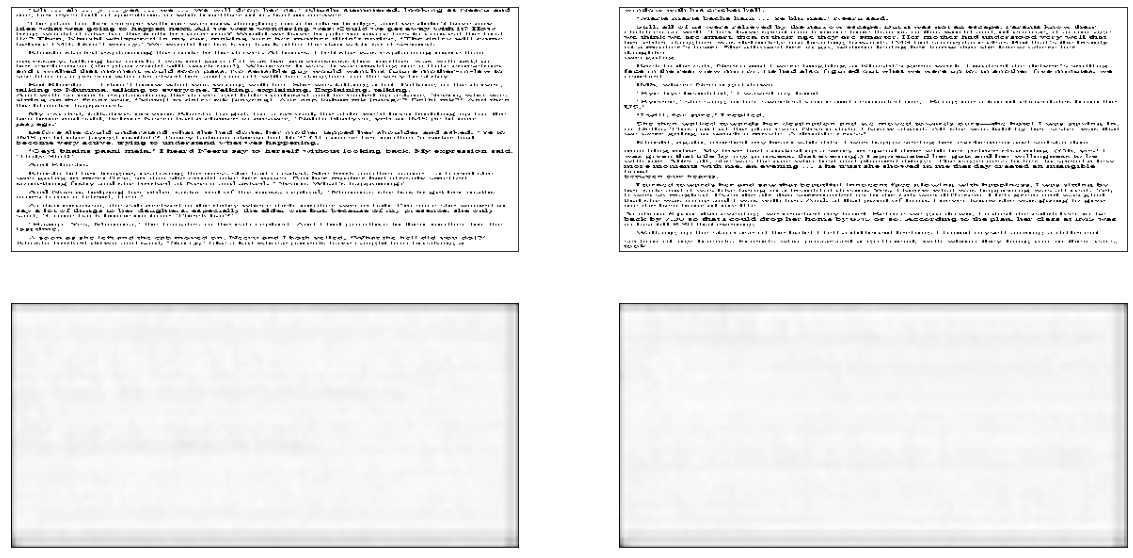

In [11]:
decoded_imgs = autoencoder.predict(x_test)

n = 2

plt.figure(figsize=(20,10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(260, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(260, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

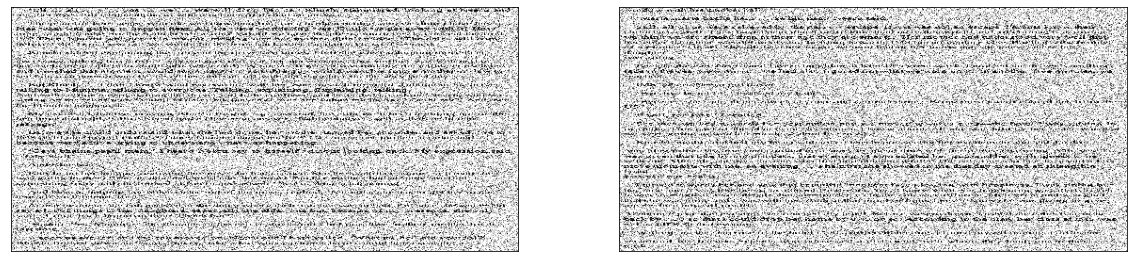

In [13]:
n = 2
plt.figure(figsize=(20, 10))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(260, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

Train on 55 samples, validate on 17 samples
Epoch 1/50
55/55 [==============================] - 12s 217ms/step - loss: 0.3153 - val_loss: 0.3284
Epoch 2/50
55/55 [==============================] - 12s 216ms/step - loss: 0.3126 - val_loss: 0.3232
Epoch 3/50
55/55 [==============================] - 12s 215ms/step - loss: 0.3134 - val_loss: 0.3251
Epoch 4/50
55/55 [==============================] - 12s 215ms/step - loss: 0.3098 - val_loss: 0.3195
Epoch 5/50
55/55 [==============================] - 12s 216ms/step - loss: 0.3092 - val_loss: 0.3219
Epoch 6/50
55/55 [==============================] - 12s 215ms/step - loss: 0.3070 - val_loss: 0.3176
Epoch 7/50
55/55 [==============================] - 12s 215ms/step - loss: 0.3070 - val_loss: 0.3200
Epoch 8/50
55/55 [==============================] - 12s 214ms/step - loss: 0.3053 - val_loss: 0.3159
Epoch 9/50
55/55 [==============================] - 12s 217ms/step - loss: 0.3051 - val_loss: 0.3185
Epoch 10/50
55/55 [============================

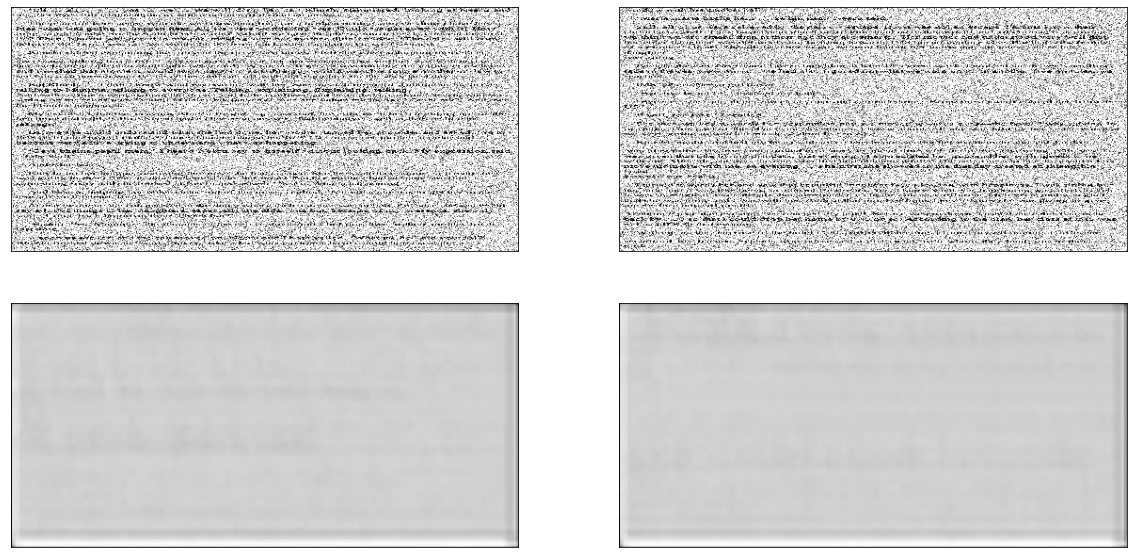

In [15]:
decoded_imgs = autoencoder.predict(x_test)

n = 2

plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(260, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(260, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
Ak = cv2.imwrite('')